In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r"C:\Users\My PC\Desktop\ML PROJECTS\Project1_Data\train_data.csv")

In [3]:
df

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,3999,4,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2282,13,19,17,17,19,20,22,27,33,...,29,67,28,21,28,76,48,11,39,74
2,2086,26,216,217,219,221,224,226,228,229,...,214,214,213,213,213,212,212,212,213,213
3,3475,13,215,209,202,211,219,198,185,200,...,181,183,169,170,174,170,175,172,154,151
4,3526,23,251,252,253,253,253,253,253,253,...,252,251,255,247,239,245,254,253,252,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,3606,26,212,222,212,220,216,142,169,173,...,108,51,74,85,102,111,116,113,135,130
928,1478,3,188,112,167,183,177,181,178,180,...,163,171,129,51,160,113,56,135,133,133
929,1268,13,169,169,169,169,169,169,169,169,...,38,39,31,24,12,37,35,47,29,68
930,1409,21,253,253,253,253,254,253,253,253,...,76,76,76,74,70,75,77,76,70,185


In [4]:
df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=True)

In [5]:
df.isna().sum()

ID       0
Class    0
C1       0
C2       0
C3       0
        ..
C2496    0
C2497    0
C2498    0
C2499    0
C2500    0
Length: 2502, dtype: int64

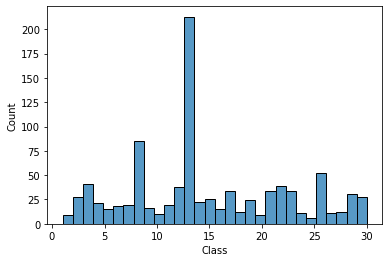

In [6]:
sns.histplot(x="Class", data = df, bins=30);

In [7]:
df1 = df.drop(['ID','Class'], axis = 1)
X = df1
y = df["Class"]

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'not majority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

4     213
13    213
9     213
11    213
1     213
14    213
18    213
10    213
24    213
27    213
3     213
21    213
19    213
20    213
30    213
28    213
8     213
7     213
5     213
17    213
12    213
25    213
2     213
29    213
6     213
15    213
22    213
23    213
26    213
16    213
Name: Class, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify = y_sm)

In [10]:
y_sm.shape

(6390,)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
y_train

3436    15
3994    18
3742    16
6015    28
5829    28
        ..
1865     5
4279    19
1247     2
5340    25
3441    15
Name: Class, Length: 5112, dtype: int64

In [13]:
pipe = Pipeline([('scaler',StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.9976525821596244

In [14]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        42
           3       1.00      0.98      0.99        42
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        42
           8       1.00      0.98      0.99        43
           9       1.00      1.00      1.00        43
          10       1.00      1.00      1.00        43
          11       0.96      1.00      0.98        43
          12       1.00      1.00      1.00        43
          13       1.00      1.00      1.00        43
          14       1.00      1.00      1.00        43
          15       1.00      1.00      1.00        42
          16       1.00      1.00      1.00        43
          17       1.00      1.00      1.00        42
          18       1.00    

In [87]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [26]:
##GRID SEARCH CV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [27]:

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.998436,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.967526,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.997066,{'logisticregression__C': 10}


In [47]:
best_clf = best_estimators['svm']

NameError: name 'best_estimators' is not defined

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  

In [33]:
best_estimators['svm'].score(X_test,y_test)


0.9992175273865415

In [34]:
best_estimators['random_forest'].score(X_test,y_test)

0.971830985915493

In [35]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9976525821596244

In [1]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

NameError: name 'cm' is not defined

<Figure size 720x504 with 0 Axes>

In [88]:
df3 = pd.read_csv(r'C:\Users\My PC\Desktop\ML PROJECTS\Project1_Data\test_data.csv')
df3

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,1869,0,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2221,0,74,60,58,71,61,66,88,71,...,128,127,125,81,69,87,124,115,118,118
2,3971,0,211,210,209,208,207,207,207,207,...,200,202,148,151,120,90,111,141,110,111
3,1309,0,253,253,253,253,253,253,253,253,...,171,119,116,117,116,117,117,117,115,222
4,2442,0,134,96,77,110,75,110,144,120,...,44,55,50,40,45,48,46,48,49,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1036,0,240,235,231,224,199,160,138,139,...,104,131,106,113,141,153,182,168,123,82
396,3651,0,253,253,253,253,253,253,253,253,...,252,252,252,253,254,253,252,250,250,253
397,3000,0,66,67,67,69,70,71,72,72,...,36,43,70,83,82,61,90,98,103,103
398,2518,0,253,253,253,253,253,253,253,253,...,253,253,253,254,218,215,254,255,255,253


In [89]:
X_predict = df3.iloc[:,2:]
X_predict = X_predict/255
X_predict

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157
1,0.290196,0.235294,0.227451,0.278431,0.239216,0.258824,0.345098,0.278431,0.356863,0.333333,...,0.501961,0.498039,0.490196,0.317647,0.270588,0.341176,0.486275,0.450980,0.462745,0.462745
2,0.827451,0.823529,0.819608,0.815686,0.811765,0.811765,0.811765,0.811765,0.819608,0.819608,...,0.784314,0.792157,0.580392,0.592157,0.470588,0.352941,0.435294,0.552941,0.431373,0.435294
3,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.670588,0.466667,0.454902,0.458824,0.454902,0.458824,0.458824,0.458824,0.450980,0.870588
4,0.525490,0.376471,0.301961,0.431373,0.294118,0.431373,0.564706,0.470588,0.356863,0.360784,...,0.172549,0.215686,0.196078,0.156863,0.176471,0.188235,0.180392,0.188235,0.192157,0.207843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.941176,0.921569,0.905882,0.878431,0.780392,0.627451,0.541176,0.545098,0.552941,0.564706,...,0.407843,0.513725,0.415686,0.443137,0.552941,0.600000,0.713725,0.658824,0.482353,0.321569
396,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.988235,0.988235,0.988235,0.992157,0.996078,0.992157,0.988235,0.980392,0.980392,0.992157
397,0.258824,0.262745,0.262745,0.270588,0.274510,0.278431,0.282353,0.282353,0.286275,0.290196,...,0.141176,0.168627,0.274510,0.325490,0.321569,0.239216,0.352941,0.384314,0.403922,0.403922
398,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.996078,0.854902,0.843137,0.996078,1.000000,1.000000,0.992157


In [90]:
X_sm = X_sm /255


In [91]:
from sklearn import svm

classifier = svm.SVC(kernel='rbf',gamma='auto', C=10)
classifier.fit(X_sm, y_sm)
y_predict = classifier.predict(X_predict)

In [96]:
classes_x = y_predict.reshape(400,1)

In [97]:
df3['Class'] = classes_x
df4 = df3[['ID','Class']]
df4

In [101]:
df4.to_csv(r'C:\Users\My PC\Desktop\ML PROJECTS\Project1_Data\svm.csv')